# Proyek Analisis Data: Bike Sharing
- **Nama:** Winati Mutmainnah
- **Email:** winatimn@gmail.com
- **ID Dicoding:** winati17

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Pada jam berapa dan musim apa order rental sepeda paling ramai dan paling sepi?
- Pertanyaan 2 : Berapa banyak order rental sepeda yang diterima perusahaan dalam pada tahun 2011-2012?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Mengambil data dari dataset day

In [2]:
day_df = pd.read_csv("dataset/data_day.csv")
display(day_df)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Mengambil data dari dataset hour

In [3]:
hour_df = pd.read_csv("dataset/data_hour.csv")
display(hour_df)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Assessing Data

Berikut adalah keterangan dari dataset dari data gathering, yakni sumber https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset

About Dataset:  
This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the Capital bike share system with the corresponding weather and seasonal information.

Data Set Information:  
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.  
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

Attribute Information:  
Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv  
instant: record index  
dteday : date  
season : season (1:springer, 2:summer, 3:fall, 4:winter)  
yr : year (0: 2011, 1:2012)  
mnth : month ( 1 to 12)  
hr : hour (0 to 23)  
holiday : weather day is holiday or not (extracted from [Web Link])  
weekday : day of the week  
workingday : if day is neither weekend nor holiday is 1, otherwise is 0. 
weathersit :  
1: Clear, Few clouds, Partly cloudy, Partly cloudy  
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  
temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)  
atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)  
hum: Normalized humidity. The values are divided to 100 (max)  
windspeed: Normalized wind speed. The values are divided to 67 (max)
casual: count of casual users  
registered: count of registered users  
cnt: count of total rental bikes including both casual and registered
for further more information please go through the following link,
http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset  

This dataset contains the hourly and daily count of rental bikes between the years 2011 and 2012 in the Capital bike share system with the corresponding weather and seasonal information.

Mari kita lihat tipe data, jumlah data non-null dan perhitungan data dasar dari dataframe day

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Pada dataframe day:
- Semua data lengkap 731, sehingga tidak ditemukan missing value  
- Terdapat inacurrate value dimana dteday yang merupakan tanggal bertipe data object. Oleh karena itu, tipe data dteday perlu diubah menjadi datetime

In [5]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe(include="all")

Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


- Tidak ditemukan duplicate data
- Min dan max value tidak ada yang terlalu jauh dari mean, sehingga tidak ditemukan outlier

Selanjutnya, mari kita lihat tipe data, jumlah data non-null dan perhitungan data dasar dari dataframe hour

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Pada dataframe day:
- Semua data lengkap 17379, sehingga tidak ditemukan missing value  
- Terdapat inacurrate value dimana dteday yang merupakan tanggal bertipe data object. Oleh karena itu,  tipe data dteday perlu diubah menjadi datetime

In [7]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe(include="all")

Jumlah duplikasi:  0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


- Tidak ditemukan duplicate data
- Min dan max value tidak ada yang terlalu jauh dari mean, sehingga tidak ditemukan outlier

### Cleaning Data

Mengubah tipe data dteday dari object menjadi datetime

In [8]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
day_df.info() #melihat tipe data apakah sudah terubah
hour_df.head() #melihat bagaimana rupa nilai dari data dteday

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore data day

Pada dataframe day, kita bisa mengelompokkan jumlah order berdasarkan musim dan bulan

In [9]:
#Pengelompokkan order berdasarkan musim
seasonal_order_items_df = day_df.groupby('season')['cnt'].mean().reset_index()
seasonal_order_items_df['season'] = ['spring', 'summer', 'fall', 'winter']
display(seasonal_order_items_df)

seasonal_order_items_df = seasonal_order_items_df.sort_values(by='cnt',ascending=False).reset_index()
display(seasonal_order_items_df)

,season,cnt
0,spring,2604.132597
1,summer,4992.331522
2,fall,5644.303191
3,winter,4728.162921


,index,season,cnt
0,2,fall,5644.303191
1,1,summer,4992.331522
2,3,winter,4728.162921
3,0,spring,2604.132597


In [10]:
#Pengelompokkan order berdasarkan bulan
# Buat dua dataframe terpisah untuk masing-masing tahun
df_2011 = day_df[day_df['dteday'].dt.year == 2011]
df_2012 = day_df[day_df['dteday'].dt.year == 2012]

In [11]:
# Untuk tahun 2011
monthly_orders_df_2011 = df_2011.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_orders_df_2011.index = monthly_orders_df_2011.index.strftime('%B')
display(monthly_orders_df_2011)

,cnt
dteday,
January,38189
February,48215
March,64045
April,94870
May,135821
June,143512
July,141341
August,136691
September,127418


In [12]:
# Untuk tahun 2012
monthly_orders_df_2012 = df_2012.resample(rule='M', on='dteday').agg({
    "cnt": "sum"
})
monthly_orders_df_2012.index = monthly_orders_df_2012.index.strftime('%B')
display(monthly_orders_df_2012)

,cnt
dteday,
January,96744
February,103137
March,164875
April,174224
May,195865
June,202830
July,203607
August,214503
September,218573


### Explore data hour

Pada dataframe hour, kita bisa mengelompokkan jumlah order berdasarkan jam

In [13]:
hourly_order_items_df = hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False).reset_index()
display(hourly_order_items_df)

,hr,cnt
0,17,461.452055
1,18,425.510989
2,8,359.011004
3,16,311.983562
4,19,311.523352
5,13,253.661180
6,12,253.315934
7,15,251.233196
8,14,240.949246
9,20,226.030220


## Visualization & Explanatory Analysis

### Pada jam berapa dan musim apa order rental sepeda paling ramai dan paling sepi?

Mari kita lihat banyaknya order rental sepeda berdasarkan jam

C:\Users\winat\AppData\Local\Temp\ipykernel_23992\1214733589.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=hourly_order_items_df.head(5), palette=colors, order=hourly_order_items_df.head(5)['hr'])


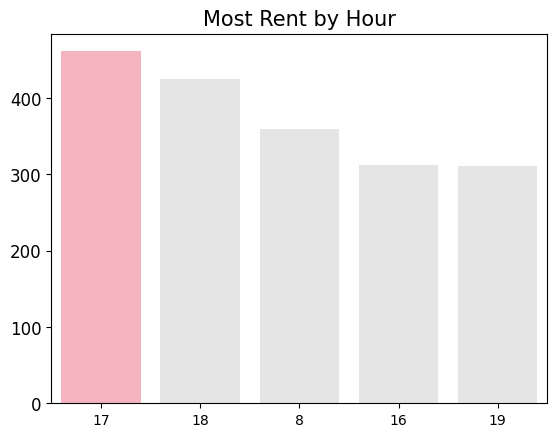

C:\Users\winat\AppData\Local\Temp\ipykernel_23992\1214733589.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=hourly_order_items_least_df.head(5), palette=colors, order=hourly_order_items_least_df.head(5)['hr'])


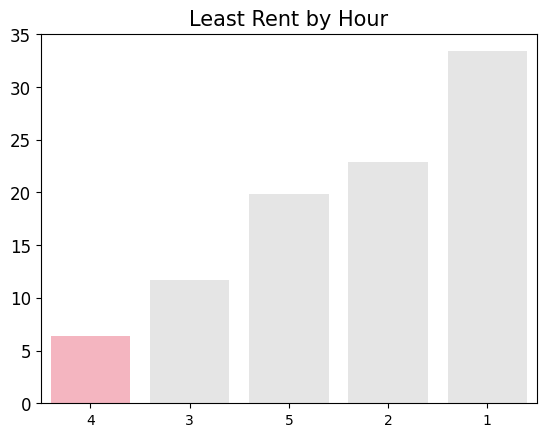

In [14]:
colors = ['#FFAAB9', "#e5e5e5", "#e5e5e5", "#e5e5e5", "#e5e5e5"]
sns.barplot(x="hr", y="cnt", data=hourly_order_items_df.head(5), palette=colors, order=hourly_order_items_df.head(5)['hr'])
plt.ylabel(None) 
plt.xlabel(None)
plt.title("Most Rent by Hour", loc="center", fontsize=15)
plt.tick_params(axis='y', labelsize=12) 
plt.show() 

hourly_order_items_least_df = hourly_order_items_df.sort_values(by=['cnt'])
sns.barplot(x="hr", y="cnt", data=hourly_order_items_least_df.head(5), palette=colors, order=hourly_order_items_least_df.head(5)['hr'])
plt.ylabel(None)
plt.xlabel(None)
plt.title("Least Rent by Hour", loc="center", fontsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.show() 


Sekarang, mari kita lihat banyaknya order rental sepeda berdasarkan musim

C:\Users\winat\AppData\Local\Temp\ipykernel_23992\3583745574.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=seasonal_order_items_df, palette=colors, order=seasonal_order_items_df['season'])
C:\Users\winat\AppData\Local\Temp\ipykernel_23992\3583745574.py:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="season", y="cnt", data=seasonal_order_items_df, palette=colors, order=seasonal_order_items_df['season'])


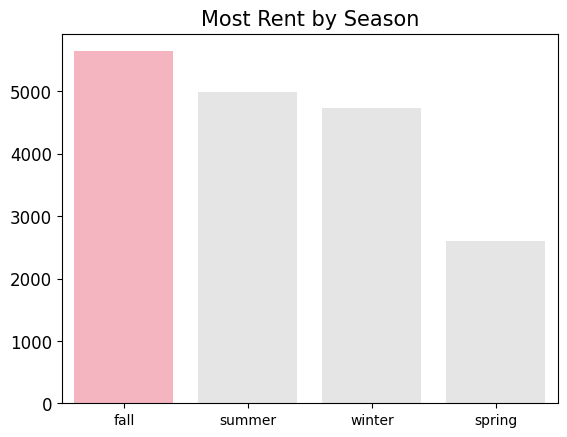

C:\Users\winat\AppData\Local\Temp\ipykernel_23992\3583745574.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="cnt", data=seasonal_order_items_least_df, palette=colors, order=seasonal_order_items_least_df['season'])
C:\Users\winat\AppData\Local\Temp\ipykernel_23992\3583745574.py:9: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(x="season", y="cnt", data=seasonal_order_items_least_df, palette=colors, order=seasonal_order_items_least_df['season'])


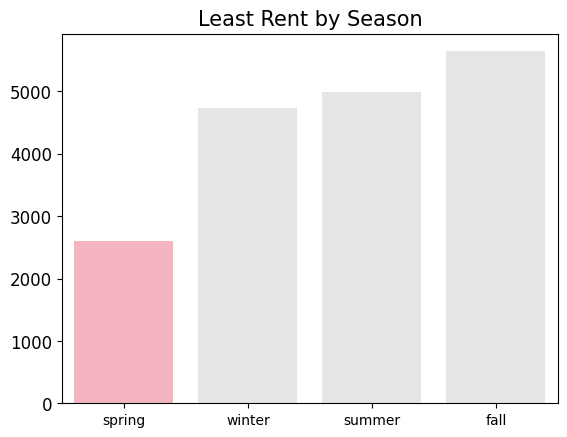

In [15]:
sns.barplot(x="season", y="cnt", data=seasonal_order_items_df, palette=colors, order=seasonal_order_items_df['season'])
plt.ylabel(None) 
plt.xlabel(None)
plt.title("Most Rent by Season", loc="center", fontsize=15)
plt.tick_params(axis='y', labelsize=12) 
plt.show() 

seasonal_order_items_least_df = seasonal_order_items_df.sort_values(by=['cnt'])
sns.barplot(x="season", y="cnt", data=seasonal_order_items_least_df, palette=colors, order=seasonal_order_items_least_df['season'])
plt.ylabel(None)
plt.xlabel(None)
plt.title("Least Rent by Season", loc="center", fontsize=15)
plt.tick_params(axis='y', labelsize=12)
plt.show() 

### Berapa banyak order rental sepeda yang diterima perusahaan dalam pada tahun 2011-2012?

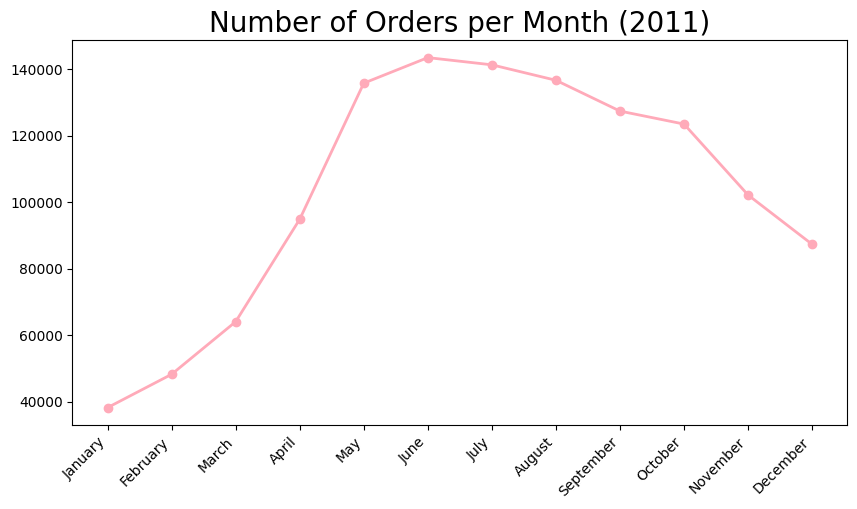

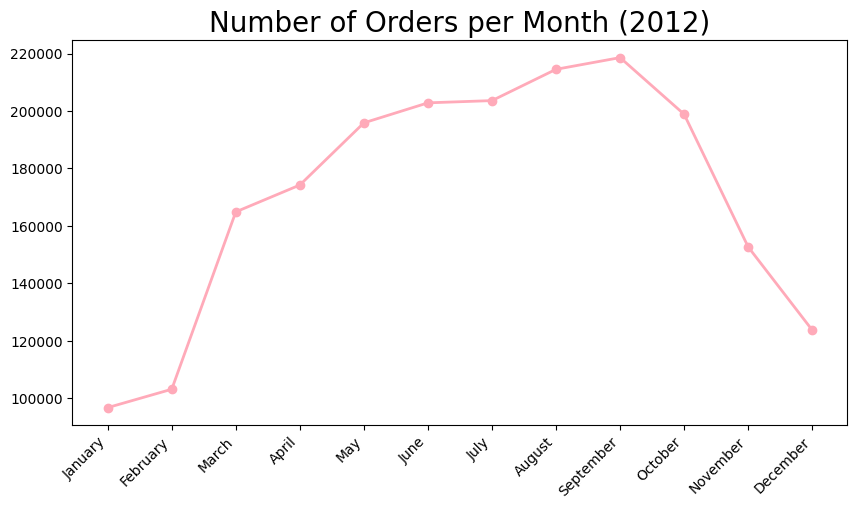

In [16]:
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df_2011["cnt"], marker='o', linewidth=2, color="#FFAAB9") 
plt.title("Number of Orders per Month (2011)", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45, ha='right')  # Menambahkan rotation dan ha='right' agar label miring
plt.yticks(fontsize=10) 
plt.show()

plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df_2012["cnt"], marker='o', linewidth=2, color="#FFAAB9") 
plt.title("Number of Orders per Month (2012)", loc="center", fontsize=20) 
plt.xticks(fontsize=10, rotation=45, ha='right')  # Menambahkan rotation dan ha='right' agar label miring
plt.yticks(fontsize=10) 
plt.show()

## Conclusion

1.  **Pertanyaan 1 : Pada jam berapa dan musim apa order rental sepeda paling ramai dan paling sepi?**
- Orang paling banyak menggunakan jasa rental sepeda pada jam 5 sore diikuti dengan jam 6 sore, jam 8 pagi, jam 4 siang, dan jam 7 sore. Sehingga bisa diambil kesimpulan bahwa orang cenderung menggunakan jasa rental sepeda di sore hari.
- Orang paling sedikit menggunakan jasa rental sepeda pada jam 4 subuh diikuti dengan jam 3 subuh, jam 5 subuh, jam 2 malam, dan jam 1 malam. Sehingga bisa diambil kesimpulan bahwa orang cenderung tidak menggunakan jasa rental sepeda di subuh hari.
- Orang paling banyak menggunakan jasa rental sepeda di musim gugur dan paling sedikit menggunakan jasa rental sepeda di musim semi.

2. **Pertanyaan 2 : Berapa banyak order rental sepeda yang diterima perusahaan dalam pada tahun 2011-2012?**  
- Pada tahun 2011, orang paling banyak melakukan rental sepeda pada bulan Juni dan paling sedikit di bulan Januari dimana terjadi kenaikan order pada rentang Januari hingga Juni dan terjadi penurunan order pada rentang Juni hingga Desember
- Pada tahun 2012, orang paling banyak melakukan rental sepeda pada bulan September dan paling sedikit di bulan Januari dimana terjadi kenaikan order pada rentang Januari hingga September dan terjadi penurunan order pada rentang September hingga Desember